# EDV Project: Employment Rates of Recent Graduates in EU
- Name: Liao Liyi    
- Student ID: 23436034


### Remarks
Since the FULL dataset is very large, I pre-filtered unnecessary attributes and customised a dataset based on the following analysis purposes.
- The employment rate is calculated by dividing the number of employed individuals (as defined by ILO) in a specific age group by the total population of that age group.
- Recent graduates: people who completed their highest education level (at least [ISCED](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=International_Standard_Classification_of_Education_(ISCED)) 3) 1-3 years ago and are not in further studies.
- Educational attainment: ISCED 2011 levels 3–8.

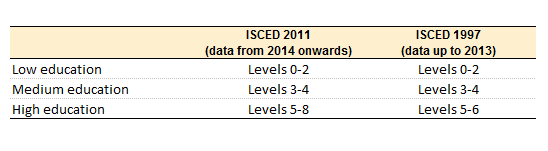

- The indicator for recent graduates is calculated for the age group 20–34.
- Metadata on element: https://ec.europa.eu/eurostat/cache/metadata/en/edat1_esms.htm


### Data sources
Employment rates of young people not in education and training by sex, educational attainment level and years since completion of highest level of education (Source of data: **Eurostat**)
- Default dataset: [edat_lfse_24](https://ec.europa.eu/eurostat/databrowser/view/edat_lfse_24/default/table?lang=en)
- Custom dataset 8436660: set age group 20-34, duration from 1-3 years, ISCED levels 3-8, 2013-2022, all sex, all geo entities except EA20
https://ec.europa.eu/eurostat/databrowser/view/edat_lfse_24__custom_8436660/default/table?lang=en



---



# Introduction

The dataset presents the employment rates of young people from different EU countries after completing their highest level of education ( a.k.a. recent graduates). I will start with a basic analysis of the dataset, then try to find some hidden patterns or trends comparing different **countries, years, and genders.**

# Part 1: Basic analysis of dataset

## Load custom dataset from github


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
from google.colab import drive
drivePath = '/content/drive'
drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Install wget
!pip install wget

In [67]:
import wget

# Setup URL and path
URL = 'https://raw.githubusercontent.com/lviiholic/lviiholic/main/edat_lfse_24__custom_8436660_linear.csv'
dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file from my github
fileName = wget.download(URL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/edat_lfse_24__custom_8436660_linear.csv


## Structure of the dataset

In [68]:
# Read file into dataframe
employment = pd.read_csv(fileName)
print(type(employment))
employment.head(10)

<class 'pandas.core.frame.DataFrame'>


,DATAFLOW,LAST UPDATE,freq,duration,isced11,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2013,87.8,NaN
1,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2014,86.8,b
2,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2015,86.4,NaN
3,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2016,88.2,NaN
4,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2017,90.0,NaN
5,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2018,85.9,NaN
6,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2019,87.4,NaN
7,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2020,88.8,NaN
8,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2021,85.2,b
9,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,AT,2022,86.6,NaN


In [69]:
# View some random data
employment.sample(10)

,DATAFLOW,LAST UPDATE,freq,duration,isced11,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
238,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,MT,2016,95.2,NaN
232,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,MK,2018,48.9,NaN
479,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,M,PC,FI,2022,86.1,NaN
331,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,SK,2019,76.9,NaN
1006,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,T,PC,SE,2014,85.0,b
157,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,HU,2020,77.4,NaN
446,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,M,PC,EL,2019,58.9,NaN
843,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,T,PC,HR,2016,72.5,NaN
161,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,F,PC,IE,2014,76.0,b
536,ESTAT:EDAT_LFSE_24(1.0),14/09/23 23:00:00,A,Y1-3,ED3-8,Y20-34,M,PC,IT,2020,60.4,NaN


In [70]:
# Check the size of dataset
shape = employment.shape
print(f"This dataset have {shape[0]} observations and {shape[1]} variables.")

This dataset have 1050 observations and 12 variables.


In [71]:
# Check the column name
employment.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'duration', 'isced11', 'age', 'sex',
       'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [72]:
# Check the index
employment.index

RangeIndex(start=0, stop=1050, step=1)

In [73]:
# Check data types and fields
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     1050 non-null   object 
 1   LAST UPDATE  1050 non-null   object 
 2   freq         1050 non-null   object 
 3   duration     1050 non-null   object 
 4   isced11      1050 non-null   object 
 5   age          1050 non-null   object 
 6   sex          1050 non-null   object 
 7   unit         1050 non-null   object 
 8   geo          1050 non-null   object 
 9   TIME_PERIOD  1050 non-null   int64  
 10  OBS_VALUE    1050 non-null   float64
 11  OBS_FLAG     259 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 98.6+ KB


There are 12 data fields within the dataset.

1.   isced11: ISCED11 - International Standard Classification of Education (ISCED 2011)
2.   sex: T for total, M for male, F for female
3.   unit: Unit of measure, PC repersents percentage
4.   geo: Geopolitical entity, Abbreviations for each country
5.   TIME_PERIOD: from 2013-2022
6.   OBS_VALUE: employment rates
7.   OBS_FLAG: Observation status (Flag)

**There are no nulls in the observations and 259 observations are flagged. In the analysis, I ignored the flags, so there may be a slight bias.**

**Flags info below:**

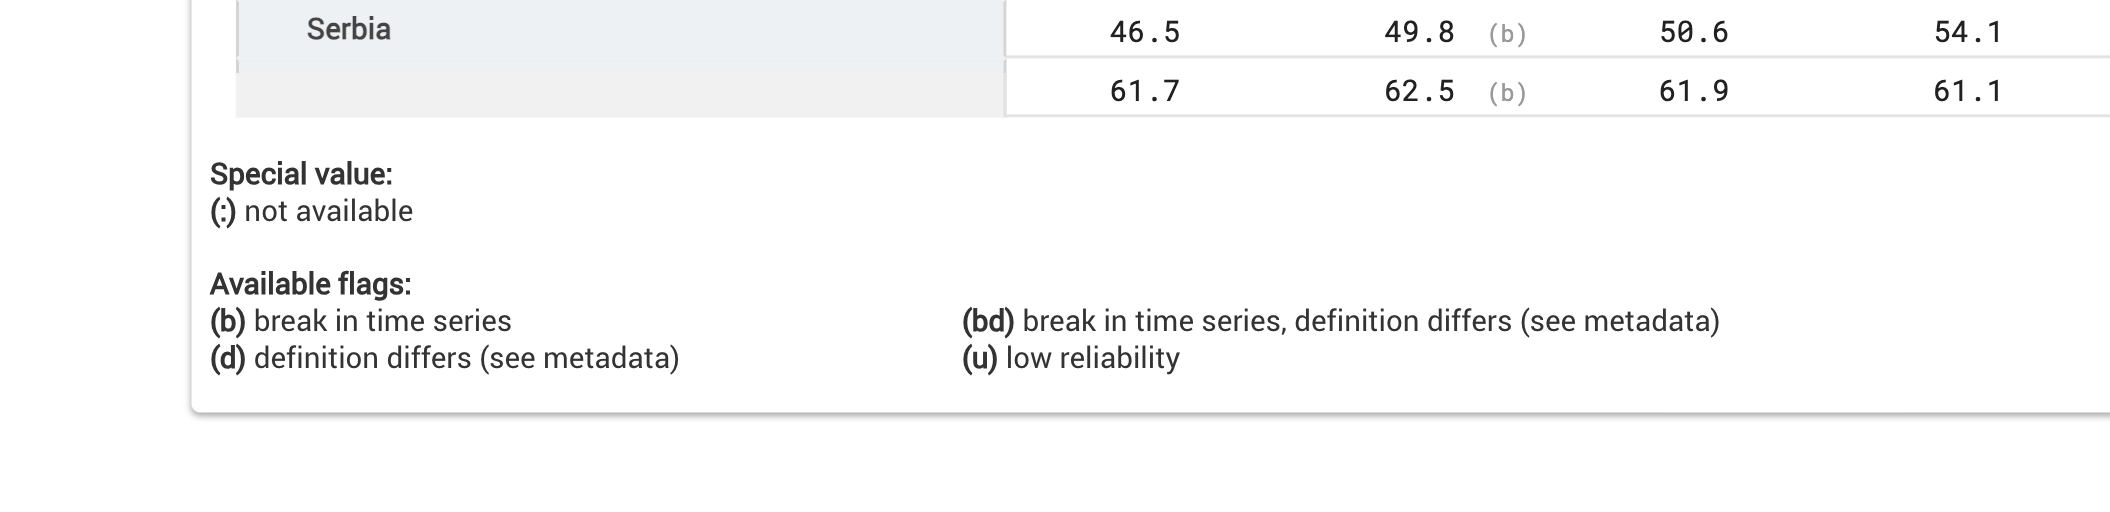

Let's see some statistical numbers

In [74]:
employment[employment['sex'] == 'T'].describe()

,TIME_PERIOD,OBS_VALUE
count,350.000000,350.000000
mean,2017.391429,77.691143
std,2.841251,11.830964
min,2013.000000,40.000000
25%,2015.000000,72.725000
50%,2017.000000,80.650000
75%,2020.000000,86.000000
max,2022.000000,96.000000


Based on the table provided, we can see that the average employment rate for recent graduates in all EU countries during the period of 2013-2022 was 77.7%. It is noteworthy that the highest employment rate recorded during the last decade was 96%, while the lowest was 40%, regardless of gender.

**Set different genders?**

In [75]:
employment[employment['sex'] == 'F'].describe()

,TIME_PERIOD,OBS_VALUE
count,350.000000,350.000000
mean,2017.391429,75.992286
std,2.841251,12.510485
min,2013.000000,37.900000
25%,2015.000000,71.100000
50%,2017.000000,78.450000
75%,2020.000000,84.900000
max,2022.000000,95.700000


In [76]:
employment[employment['sex'] == 'M'].describe()

,TIME_PERIOD,OBS_VALUE
count,350.000000,350.000000
mean,2017.391429,79.460857
std,2.841251,11.705059
min,2013.000000,42.700000
25%,2015.000000,74.125000
50%,2017.000000,82.550000
75%,2020.000000,87.875000
max,2022.000000,96.800000


We can find that the average employment rate of male graduates (79.46%) is higher than that of females (75.99%) in the last ten years.

## Case selection

### Employment rates for UK recent graduates over the years, by gender

In [77]:
employment[employment['geo'] == 'UK'].groupby(by='sex')[['OBS_VALUE']].mean()

,OBS_VALUE
sex,
F,84.114286
M,86.257143
T,85.128571


### Employment rates for German recent graduates over the years, by gender

In [78]:
employment[employment['geo'] == 'DE'].groupby(by='sex')[['OBS_VALUE']].mean()

,OBS_VALUE
sex,
F,89.06
M,92.59
T,90.89


### Create a pivot table for compare the average annual employment rates in 5 countries

In [79]:
# Filtered data for five countries
five_countries = ['NL', 'DE', 'MT', 'IT', 'FR'] # can change to compare different countries
five_filtered = employment[(employment['geo'].isin(five_countries)) & (employment['sex'] == 'T')]

# Create pivot table
pivot_table = pd.pivot_table(five_filtered, values='OBS_VALUE', index=['geo'], columns='TIME_PERIOD', aggfunc='mean')
print("Comparison Pivot Table:")
pivot_table

Comparison Pivot Table:


TIME_PERIOD,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
geo,,,,,,,,,,
DE,89.7,90.0,90.4,90.1,90.9,92.1,92.7,89.6,91.2,92.2
FR,76.4,75.5,71.8,72.6,73.6,77.9,75.7,74.9,78.1,78.6
IT,48.5,45.0,48.5,52.9,55.2,56.5,58.7,56.8,57.9,65.2
MT,92.5,93.6,95.1,96.0,93.8,94.8,93.5,92.0,89.0,90.8
NL,86.0,86.2,88.2,90.1,90.4,92.0,91.9,89.3,93.4,92.9


### Which country has been ranked bottom of the list the most times?

In [80]:
# Filtered data
min_employment_idx = employment[employment['sex'] == 'T'].groupby('TIME_PERIOD')['OBS_VALUE'].idxmin()
min_employment_countries = employment.loc[min_employment_idx, 'geo']

min_df = pd.DataFrame({'Year': employment.loc[min_employment_idx, 'TIME_PERIOD'],
                       'Country': min_employment_countries.values,
                       'Employment Rate': employment.loc[min_employment_idx, 'OBS_VALUE'].values})
display(min_df)

,Year,Country,Employment Rate
790,2013,EL,40.0
928,2014,MK,42.6
792,2015,EL,45.2
930,2016,MK,46.9
931,2017,MK,50.0
932,2018,MK,49.2
933,2019,MK,57.2
1042,2020,TR,53.0
887,2021,IT,57.9
888,2022,IT,65.2


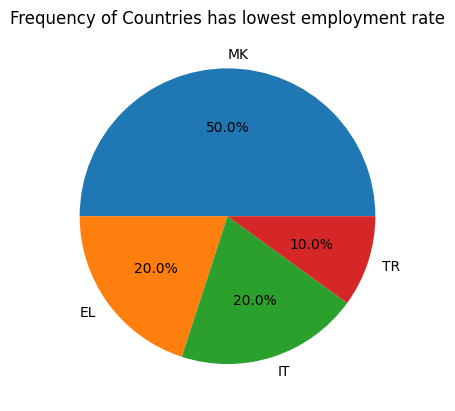

In [81]:
# Count the frequency of each country
country_counts = min_df['Country'].value_counts()

# Create the pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Countries has lowest employment rate')
plt.show()

North Macedonia has had the lowest employment rate the most times in the last decade at 5, while Italy has held the title for two consecutive years. It shows that Italy may have a tough employment situation for recent graduates.

### Which country has been ranked top of the list the most times?

In [82]:
# Filtered data
max_employment_idx = employment[employment['sex'] == 'T'].groupby('TIME_PERIOD')['OBS_VALUE'].idxmax()
max_employment_countries = employment.loc[max_employment_idx, 'geo']

max_df = pd.DataFrame({'Year': employment.loc[max_employment_idx, 'TIME_PERIOD'],
                       'Country': max_employment_countries.values,
                       'Employment Rate': employment.loc[max_employment_idx, 'OBS_VALUE'].values})
display(max_df)

,Year,Country,Employment Rate
935,2013,MT,92.5
936,2014,MT,93.6
937,2015,MT,95.1
938,2016,MT,96.0
874,2017,IS,94.8
940,2018,MT,94.8
941,2019,MT,93.5
942,2020,MT,92.0
953,2021,NL,93.4
908,2022,LU,93.4


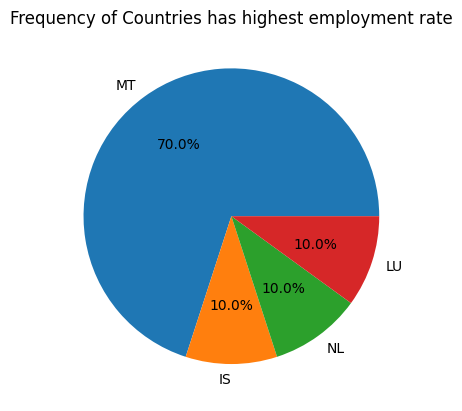

In [83]:
# Count the frequency of each country
country_counts = max_df['Country'].value_counts()

# Create the pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Countries has highest employment rate')
plt.show()

Over the past decade, Malta has consistently been one of the countries with the best employment conditions for recent graduates in Europe, with consecutive top rankings in employment rates from 2013-2020, except only once Iceland ranked first in 2017.

# Part2: Data exploration and visualization

## Q1: How has the employment rate of recent graduates in EU countries changed over the past decade? Any trends?

### **Overall trends**
Filter EU27_2020 to see the overall trend in average employment rates.

**Will gender affect the employment prospects of recent graduates?**

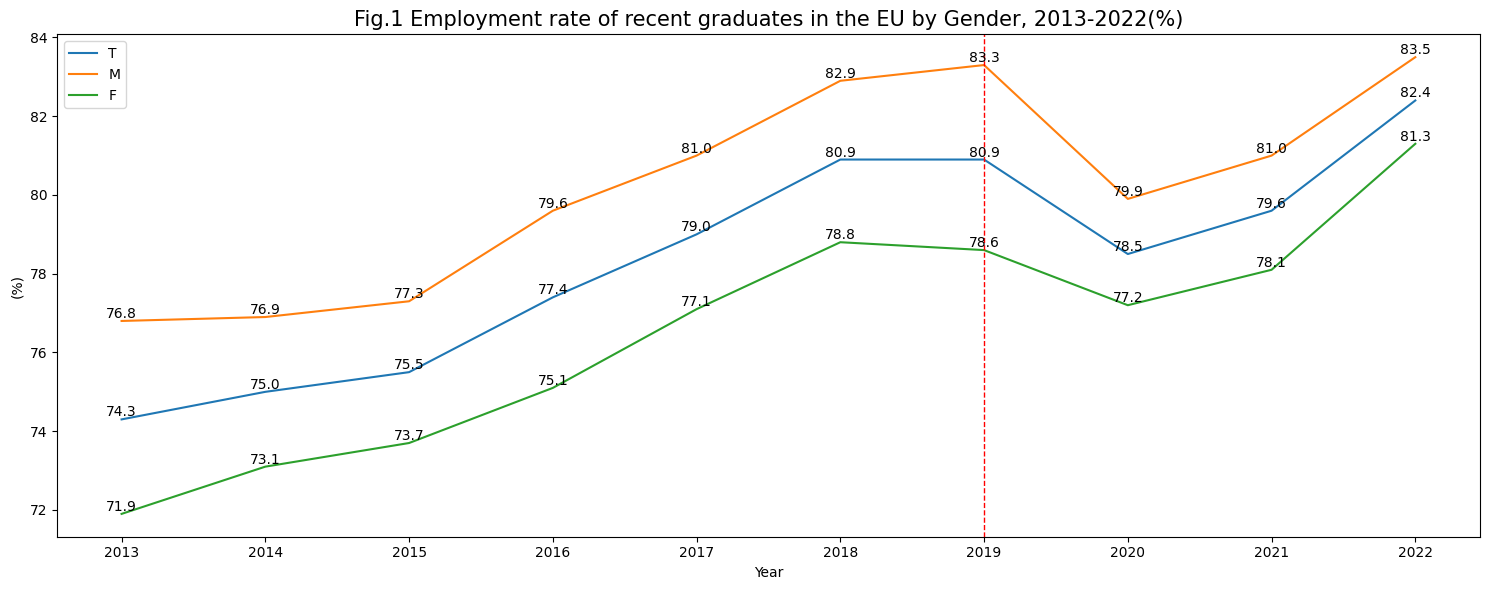

In [84]:
# Filtered data for line chart
filtered_EU = employment[employment['geo'] == 'EU27_2020']
sex_to_compare = ['T', 'M', 'F']
fig1 = filtered_EU.pivot_table(values='OBS_VALUE', index='TIME_PERIOD')

# Create the line chart
plt.figure(figsize=(15, 6))

for sex in sex_to_compare:
    plt.plot(fig1.index, filtered_EU[filtered_EU['sex'] == sex]['OBS_VALUE'], label=sex)
    for x, y in zip(fig1.index, filtered_EU[filtered_EU['sex'] == sex]['OBS_VALUE']):
      plt.text(x, y, str(y), ha='center', va='bottom')

# Add labels
plt.xlabel('Year')
plt.ylabel('(%)')
plt.title('Fig.1 Employment rate of recent graduates in the EU by Gender, 2013-2022(%)', size=15)
plt.legend()
plt.xticks(fig1.index)
plt.tight_layout()
plt.axvline(2019, color='red', linestyle='--', linewidth=1)
plt.show()

### **Selected trends**
Filter the top 10 countries in the EU in terms of GDP per capita in 2022.

Reference: https://ec.europa.eu/eurostat/statistics-explained/index.php?title=GDP_per_capita,_consumption_per_capita_and_price_level_indices#Overview

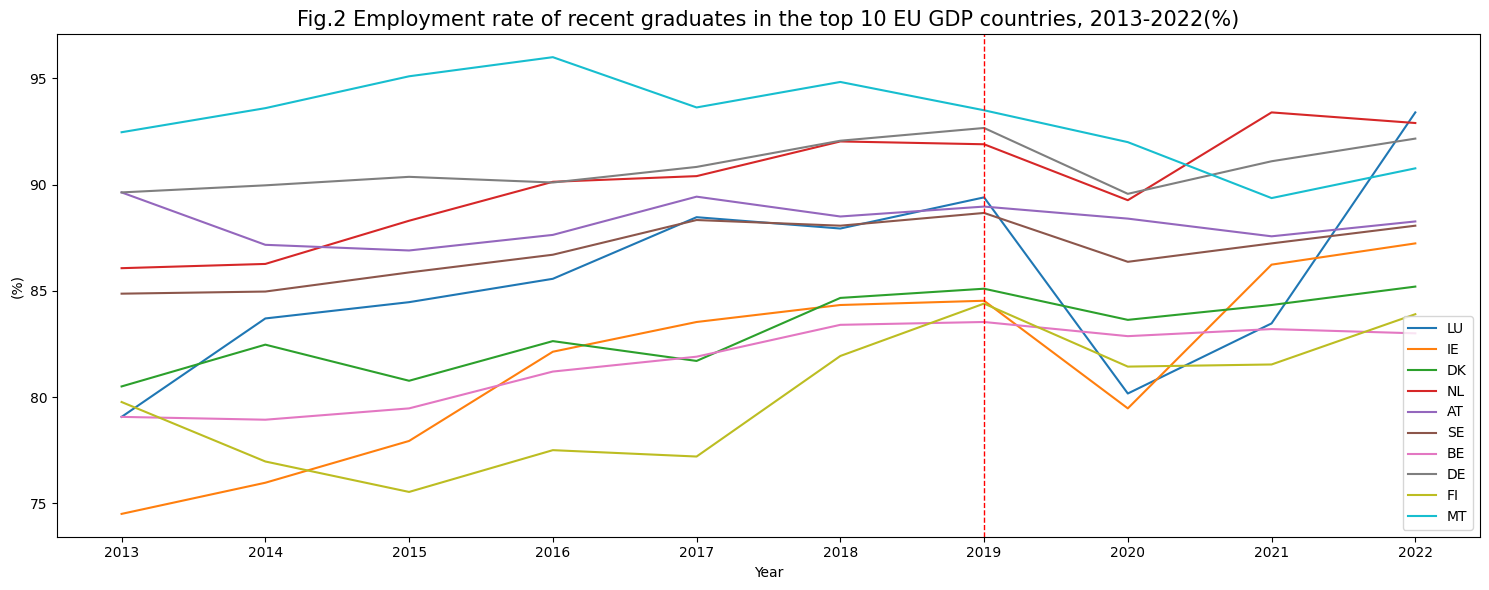

In [85]:
# Filtered data for multiple countries (rank by GDP)
countries_to_compare = ['LU', 'IE', 'DK', 'NL', 'AT', 'SE', 'BE', 'DE', 'FI', 'MT']
filtered_countries = employment[employment['geo'].isin(countries_to_compare)]
fig2 = filtered_countries.pivot_table(values='OBS_VALUE', columns='geo', index='TIME_PERIOD')

# Create the line chart
plt.figure(figsize=(15, 6))

for country in countries_to_compare:
    plt.plot(fig2.index, fig2[country], label=country)

# Add labels
plt.xlabel('Year')
plt.ylabel('(%)')
plt.title('Fig.2 Employment rate of recent graduates in the top 10 EU GDP countries, 2013-2022(%)', size=15)
plt.legend()
plt.xticks(fig2.index)
plt.tight_layout()
plt.axvline(2019, color='red', linestyle='--', linewidth=1)
plt.show()

## Q2: In 2022, which country has the highest employability of recent graduates in EU?
### **And which one is the hardest?**

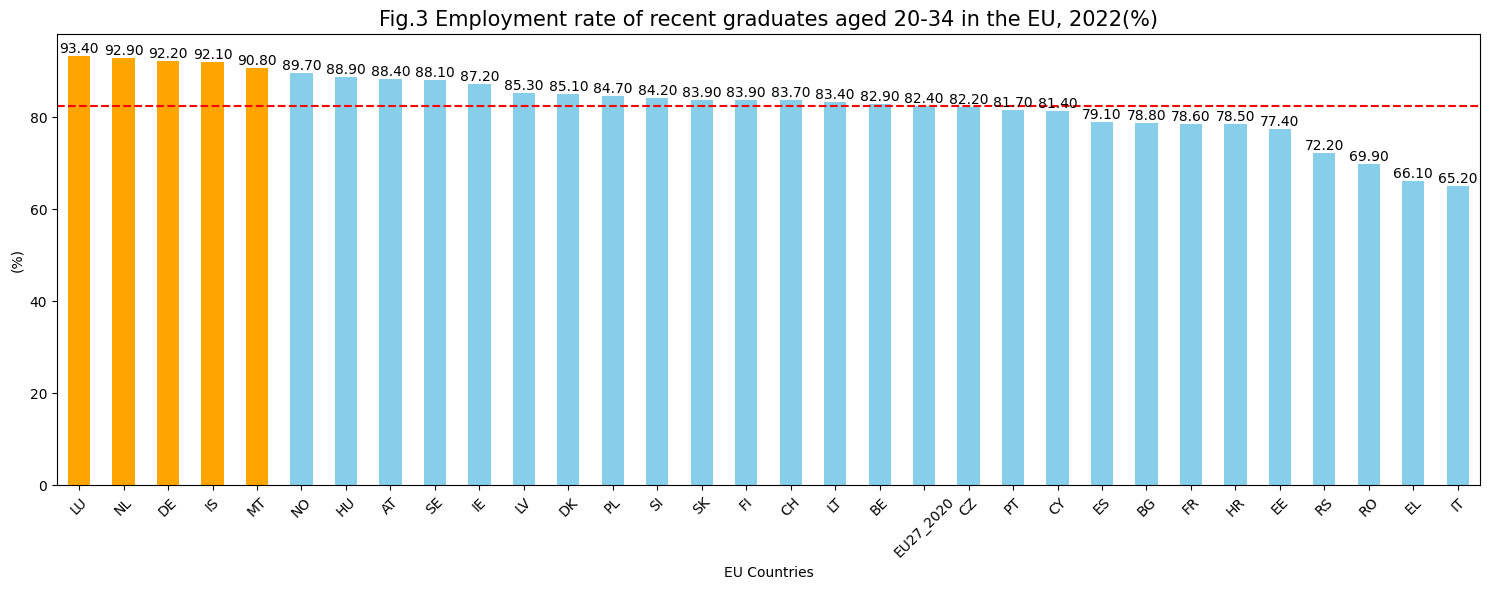

In [86]:
# Filtered data for 2022, geo, and sex=T
filtered_2022 = employment[(employment['TIME_PERIOD'] == 2022) & (employment['sex'] == 'T')]

# Calculate the mean employment rate by countries
employment_by_countries = filtered_2022.groupby('geo')['OBS_VALUE'].mean()

# Sort by DESC
employment_by_countries = employment_by_countries.sort_values(ascending = False)

# Create a bar chart
plt.figure(figsize=(15, 6))

# Set the color for the top 5 bars to orange
color = ['orange' if i < 5 else 'skyblue' for i in range(len(employment_by_countries))]
bars = employment_by_countries.plot(kind='bar', color=color)

# Add a red horizontal line for the average employment rate
avg_2022 = employment_by_countries.loc['EU27_2020']
plt.axhline(avg_2022, color='red', linestyle='--', label='EU Average')

# Add labels
plt.xlabel('EU Countries')
plt.ylabel('(%)')
plt.title('Fig.3 Employment rate of recent graduates aged 20-34 in the EU, 2022(%)', size=15)
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels to each bar
for i, value in enumerate(employment_by_countries):
  plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

### **What are the gender differences in employment in different countries?**

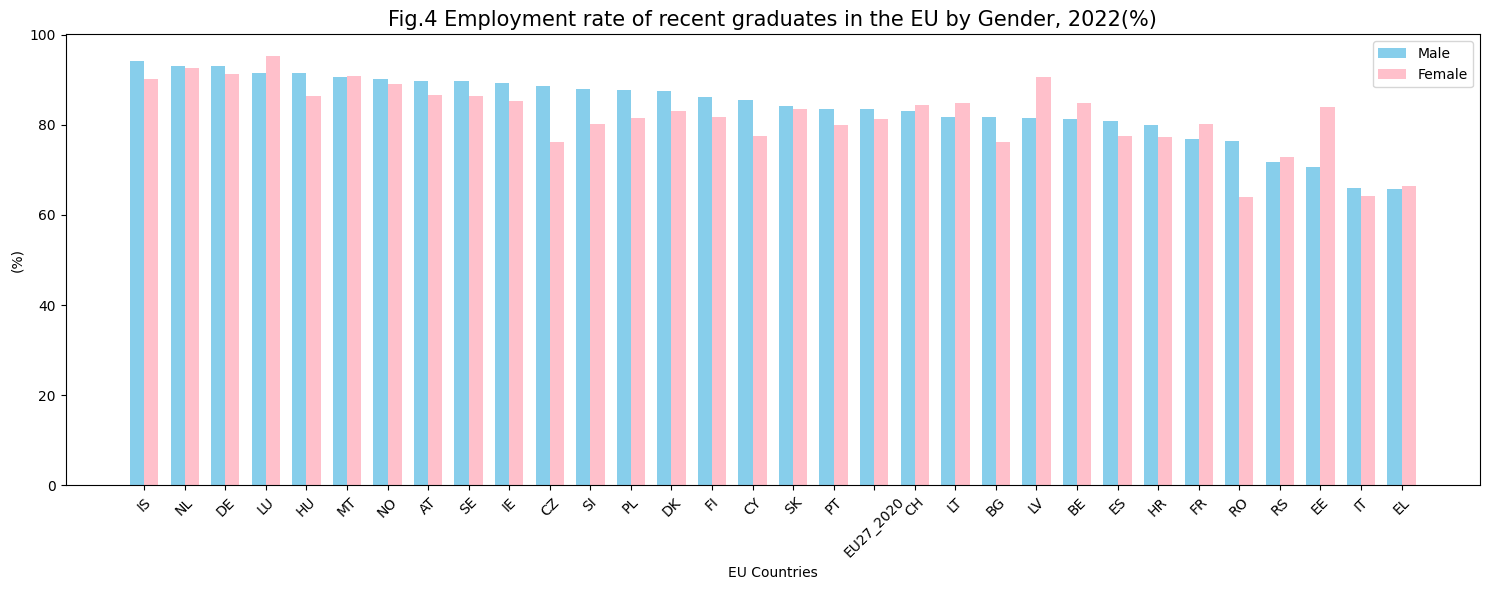

In [87]:
# Filtered data for 2022, geo, and sex
filtered_2022_sex = employment[(employment['TIME_PERIOD'] == 2022) & (employment['sex'].isin(['M', 'F']))]

# Calculate the mean employment rate by countries and sex
employment_by_sex = filtered_2022_sex.groupby(['geo', 'sex'])['OBS_VALUE'].mean().unstack()

# Sort by DESC
employment_by_sex = employment_by_sex.sort_values(by='M', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 6))

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x
r1 = np.arange(len(employment_by_sex.index))
r2 = [x + bar_width for x in r1]

# Plot the bars for M and F
plt.bar(r1, employment_by_sex['M'], color='skyblue', width=bar_width, label='Male')
plt.bar(r2, employment_by_sex['F'], color='pink', width=bar_width, label='Female')

# Add labels
plt.xticks([r + bar_width / 2 for r in range(len(employment_by_sex.index))], employment_by_sex.index, rotation=45)
plt.xlabel('EU Countries')
plt.ylabel('(%)')
plt.title('Fig.4 Employment rate of recent graduates in the EU by Gender, 2022(%)', size=15)

plt.legend()
plt.tight_layout()
plt.show()

### **Thanks for watching!**